<h1><center>Mid Term Project: Equity Portfolio Management</center></h1>

## LAKSHMI PRIYA RAMISETTY - lramiset@mail.yu.edu

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import math

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Stocks 
universe = ['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN', 'META', 'NFLX', 'TSLA', 'ORCL', 'SAP']

# Data Preparation

In [3]:
# DataFrame with Close and Adj Close of all stocks
temp_df = pd.DataFrame(columns=["Date"])
for stock in universe:
    df = pd.read_csv(stock + ".csv", usecols=["Date","Close","Adj Close"])
    df.columns = ["Date", stock + "_Close", stock + "_Adj Close"]
    temp_df = pd.merge(temp_df, df, on = 'Date', how = 'outer')
temp_df.head()

,Date,IBM_Close,IBM_Adj Close,MSFT_Close,MSFT_Adj Close,GOOG_Close,GOOG_Adj Close,AAPL_Close,AAPL_Adj Close,AMZN_Close,...,META_Close,META_Adj Close,NFLX_Close,NFLX_Adj Close,TSLA_Close,TSLA_Adj Close,ORCL_Close,ORCL_Adj Close,SAP_Close,SAP_Adj Close
0,2018-01-02,147.466537,111.800156,85.949997,80.391830,53.250000,53.250000,43.064999,40.776527,59.450500,...,181.419998,181.419998,201.070007,201.070007,21.368668,21.368668,46.630001,42.282444,112.389999,101.210297
1,2018-01-03,151.520081,114.873306,86.349998,80.765984,54.124001,54.124001,43.057499,40.769421,60.209999,...,184.669998,184.669998,205.050003,205.050003,21.150000,21.150000,47.709999,43.261761,113.309998,102.038780
2,2018-01-04,154.588913,117.199875,87.110001,81.476845,54.320000,54.320000,43.257500,40.958797,60.479500,...,184.330002,184.330002,205.630005,205.630005,20.974667,20.974667,48.180000,43.687927,115.050003,103.605690
3,2018-01-05,155.344162,117.772476,88.190002,82.487000,55.111500,55.111500,43.750000,41.425125,61.457001,...,186.850006,186.850006,209.990005,209.990005,21.105333,21.105333,48.470001,43.950893,116.330002,104.758369
4,2018-01-08,156.281067,118.482796,88.279999,82.571159,55.347000,55.347000,43.587502,41.271259,62.343498,...,188.279999,188.279999,212.050003,212.050003,22.427334,22.427334,48.980000,44.413342,114.800003,103.380554


In [4]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            250 non-null    object 
 1   IBM_Close       250 non-null    float64
 2   IBM_Adj Close   250 non-null    float64
 3   MSFT_Close      250 non-null    float64
 4   MSFT_Adj Close  250 non-null    float64
 5   GOOG_Close      250 non-null    float64
 6   GOOG_Adj Close  250 non-null    float64
 7   AAPL_Close      250 non-null    float64
 8   AAPL_Adj Close  250 non-null    float64
 9   AMZN_Close      250 non-null    float64
 10  AMZN_Adj Close  250 non-null    float64
 11  META_Close      250 non-null    float64
 12  META_Adj Close  250 non-null    float64
 13  NFLX_Close      250 non-null    float64
 14  NFLX_Adj Close  250 non-null    float64
 15  TSLA_Close      250 non-null    float64
 16  TSLA_Adj Close  250 non-null    float64
 17  ORCL_Close      250 non-null    flo

In [5]:
# Converting the Date column to datetime
temp_df['Date'] = pd.to_datetime(temp_df['Date'])

In [6]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            250 non-null    datetime64[ns]
 1   IBM_Close       250 non-null    float64       
 2   IBM_Adj Close   250 non-null    float64       
 3   MSFT_Close      250 non-null    float64       
 4   MSFT_Adj Close  250 non-null    float64       
 5   GOOG_Close      250 non-null    float64       
 6   GOOG_Adj Close  250 non-null    float64       
 7   AAPL_Close      250 non-null    float64       
 8   AAPL_Adj Close  250 non-null    float64       
 9   AMZN_Close      250 non-null    float64       
 10  AMZN_Adj Close  250 non-null    float64       
 11  META_Close      250 non-null    float64       
 12  META_Adj Close  250 non-null    float64       
 13  NFLX_Close      250 non-null    float64       
 14  NFLX_Adj Close  250 non-null    float64       
 15  TSLA_C

In [7]:
temp_df.head()

,Date,IBM_Close,IBM_Adj Close,MSFT_Close,MSFT_Adj Close,GOOG_Close,GOOG_Adj Close,AAPL_Close,AAPL_Adj Close,AMZN_Close,...,META_Close,META_Adj Close,NFLX_Close,NFLX_Adj Close,TSLA_Close,TSLA_Adj Close,ORCL_Close,ORCL_Adj Close,SAP_Close,SAP_Adj Close
0,2018-01-02,147.466537,111.800156,85.949997,80.391830,53.250000,53.250000,43.064999,40.776527,59.450500,...,181.419998,181.419998,201.070007,201.070007,21.368668,21.368668,46.630001,42.282444,112.389999,101.210297
1,2018-01-03,151.520081,114.873306,86.349998,80.765984,54.124001,54.124001,43.057499,40.769421,60.209999,...,184.669998,184.669998,205.050003,205.050003,21.150000,21.150000,47.709999,43.261761,113.309998,102.038780
2,2018-01-04,154.588913,117.199875,87.110001,81.476845,54.320000,54.320000,43.257500,40.958797,60.479500,...,184.330002,184.330002,205.630005,205.630005,20.974667,20.974667,48.180000,43.687927,115.050003,103.605690
3,2018-01-05,155.344162,117.772476,88.190002,82.487000,55.111500,55.111500,43.750000,41.425125,61.457001,...,186.850006,186.850006,209.990005,209.990005,21.105333,21.105333,48.470001,43.950893,116.330002,104.758369
4,2018-01-08,156.281067,118.482796,88.279999,82.571159,55.347000,55.347000,43.587502,41.271259,62.343498,...,188.279999,188.279999,212.050003,212.050003,22.427334,22.427334,48.980000,44.413342,114.800003,103.380554


# Strategy

In [8]:
# Function to calculate dividend of all stocks.
def Calculate_Dividend(df, stock_name):
    df[stock_name+ 'Close_Ratio'] = df[stock_name + "_Close"].shift(1) / df[stock_name +"_Close"]
    df[stock_name+ 'Adj_Close_Ratio'] = df[stock_name + "_Adj Close"].shift(1) / df[stock_name +"_Adj Close"]
    df[stock_name+'Close_diff'] = df[stock_name+'Close_Ratio'] - df[stock_name+'Adj_Close_Ratio']
    df[stock_name+'_Dividend'] = (df[stock_name+'Close_diff'] * df[stock_name+'_Close']).round(4)
    
    df = df.drop([stock_name+'Close_Ratio',stock_name+'Adj_Close_Ratio',stock_name+'Close_diff'],axis=1)
    
    return df

In [9]:
# Setting the Date column as index
stocks_df = temp_df.set_index('Date')
stocks_df.head()

,IBM_Close,IBM_Adj Close,MSFT_Close,MSFT_Adj Close,GOOG_Close,GOOG_Adj Close,AAPL_Close,AAPL_Adj Close,AMZN_Close,AMZN_Adj Close,META_Close,META_Adj Close,NFLX_Close,NFLX_Adj Close,TSLA_Close,TSLA_Adj Close,ORCL_Close,ORCL_Adj Close,SAP_Close,SAP_Adj Close
Date,,,,,,,,,,,,,,,,,,,,
2018-01-02,147.466537,111.800156,85.949997,80.391830,53.250000,53.250000,43.064999,40.776527,59.450500,59.450500,181.419998,181.419998,201.070007,201.070007,21.368668,21.368668,46.630001,42.282444,112.389999,101.210297
2018-01-03,151.520081,114.873306,86.349998,80.765984,54.124001,54.124001,43.057499,40.769421,60.209999,60.209999,184.669998,184.669998,205.050003,205.050003,21.150000,21.150000,47.709999,43.261761,113.309998,102.038780
2018-01-04,154.588913,117.199875,87.110001,81.476845,54.320000,54.320000,43.257500,40.958797,60.479500,60.479500,184.330002,184.330002,205.630005,205.630005,20.974667,20.974667,48.180000,43.687927,115.050003,103.605690
2018-01-05,155.344162,117.772476,88.190002,82.487000,55.111500,55.111500,43.750000,41.425125,61.457001,61.457001,186.850006,186.850006,209.990005,209.990005,21.105333,21.105333,48.470001,43.950893,116.330002,104.758369
2018-01-08,156.281067,118.482796,88.279999,82.571159,55.347000,55.347000,43.587502,41.271259,62.343498,62.343498,188.279999,188.279999,212.050003,212.050003,22.427334,22.427334,48.980000,44.413342,114.800003,103.380554


In [10]:
for stock in universe:
    stocks_df = Calculate_Dividend(stocks_df, stock)
stocks_df.head()

,IBM_Close,IBM_Adj Close,MSFT_Close,MSFT_Adj Close,GOOG_Close,GOOG_Adj Close,AAPL_Close,AAPL_Adj Close,AMZN_Close,AMZN_Adj Close,...,IBM_Dividend,MSFT_Dividend,GOOG_Dividend,AAPL_Dividend,AMZN_Dividend,META_Dividend,NFLX_Dividend,TSLA_Dividend,ORCL_Dividend,SAP_Dividend
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,147.466537,111.800156,85.949997,80.391830,53.250000,53.250000,43.064999,40.776527,59.450500,59.450500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,151.520081,114.873306,86.349998,80.765984,54.124001,54.124001,43.057499,40.769421,60.209999,60.209999,...,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0
2018-01-04,154.588913,117.199875,87.110001,81.476845,54.320000,54.320000,43.257500,40.958797,60.479500,60.479500,...,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0
2018-01-05,155.344162,117.772476,88.190002,82.487000,55.111500,55.111500,43.750000,41.425125,61.457001,61.457001,...,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-08,156.281067,118.482796,88.279999,82.571159,55.347000,55.347000,43.587502,41.271259,62.343498,62.343498,...,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0


In [11]:
# 1. Initial portfolio - 1 Million dollar in each of these stocks ['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN']
cash_in_hand = 5000000
stocks_to_buy = ['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN']
initial_portfolio = {} #Shares that were bought
cash_per_stock = cash_in_hand / len(stocks_to_buy)
for stock in stocks_to_buy:
    initial_portfolio[stock] = cash_per_stock // stocks_df.loc['2018-01-02', stock + "_Close"]
    cash_in_hand -= (stocks_df.loc['2018-01-02', stock + "_Close"] * initial_portfolio[stock])
initial_portfolio

{'IBM': 6781.0,
 'MSFT': 11634.0,
 'GOOG': 18779.0,
 'AAPL': 23220.0,
 'AMZN': 16820.0}

In [12]:
# 2. Rebalancing strategy - rebalance_type takes low and high as values

def RebalanceStocks(df,num_stocks_bought, cash_in_hand, prev_date, curr_date, rebalance_type):
    
    #Sell off current stocks and add to cash in hand
    for stock in num_stocks_bought:
        cash_in_hand += num_stocks_bought[stock] * df.loc[curr_date, stock +"_Close"]
    
    # We will check the current Adj close percentage change
    stock_drops = {}
    for stock in universe:
        stock_drops[stock] = (df.loc[prev_date, stock+"_Adj Close"] - df.loc[curr_date, stock+"_Adj Close"])/df.loc[prev_date, stock+"_Adj Close"]
    
    # If rebalance type is low then we get the values whose Adj close changed the least
    if rebalance_type == "low": 
        stocks_to_buy = sorted(stock_drops, key=stock_drops.get,reverse=True)[0:5]
    # If rebalance type is high then we get the values whose Adj close changed the most
    elif rebalance_type == "high":
        stocks_to_buy = sorted(stock_drops, key=stock_drops.get)[0:5]
    
    # Now lets buy the new stocks
    cash_per_stock = cash_in_hand / len(stocks_to_buy)
    num_stocks_bought = {}
    for stock in stocks_to_buy:
        num_stocks_bought[stock] = cash_per_stock // df.loc[curr_date, stock+"_Close"]
        cash_in_hand -= (df.loc[curr_date, stock+"_Close"] * num_stocks_bought[stock])
        
    return cash_in_hand, num_stocks_bought

In [13]:
# 3. Function to add the dividend to cash in hand
def sumDividend(df,num_stocks_bought,date):
    dividend = 0
    for stock in num_stocks_bought:
        dividend += num_stocks_bought[stock] * np.nan_to_num(df.loc[date, stock+"_Dividend"])
    
    return dividend

In [14]:
# 4. 
print(RebalanceStocks(stocks_df,initial_portfolio,cash_in_hand,'2018-01-02','2018-01-09', "low"))

(166.10426300088875, {'AAPL': 23829.0, 'SAP': 9097.0, 'MSFT': 11772.0, 'META': 5528.0, 'GOOG': 18776.0})


In [15]:
# 5, 6. Function to calculate MTM using both strategies
def calculate_mtm(rebalance_type):
    # Initialize values
    cash_in_hand = 5000000
    stocks_to_buy = universe
    num_stocks_bought = {} 
    cash_per_stock = cash_in_hand / len(stocks_to_buy)
    MTM = 0
    
    all_dates = stocks_df.index.tolist()
    prev_date = '2018-01-02'
    counter = 0
    all_mtms = []
    
    for stock in stocks_to_buy:
        num_stocks_bought[stock] = cash_per_stock // stocks_df.loc['2018-01-02', stock+"_Close"]
        cash_in_hand -= (stocks_df.loc['2018-01-02', stock+"_Close"] * num_stocks_bought[stock])

    # Adding dividend and calculating MTM until the end of our dataframe
    for date in all_dates:
        cash_in_hand += sumDividend(stocks_df,num_stocks_bought,date)

        if (counter%5 == 0):
            if rebalance_type == "low":
                cash_in_hand, num_stocks_bought = RebalanceStocks(stocks_df,num_stocks_bought,cash_in_hand,prev_date,date,"low")
            elif rebalance_type == "high":
                cash_in_hand, num_stocks_bought = RebalanceStocks(stocks_df,num_stocks_bought,cash_in_hand,prev_date,date,"high")

        MTM = cash_in_hand
        for stock in num_stocks_bought:
            MTM += num_stocks_bought[stock] * stocks_df.loc[date, stock+"_Close"]

        all_mtms.append(MTM.round(2))
        counter += 1  
        prev_date = date

    return pd.Series(all_mtms)

In [16]:
all_dates = stocks_df.index.tolist()
MTM_array_low = calculate_mtm("low")
MTM_array_high = calculate_mtm("high")
print(MTM_array_low, MTM_array_high)

0      5000000.00
1      5061154.18
2      5103663.50
3      5164090.57
4      5187050.88
          ...    
245    4899182.80
246    4777853.00
247    5102937.99
248    5121250.62
249    5123378.95
Length: 250, dtype: float64 0      5000000.00
1      5061154.18
2      5103663.50
3      5164090.57
4      5187050.88
          ...    
245    4819085.99
246    4647897.24
247    4965037.91
248    4959690.20
249    4992714.52
Length: 250, dtype: float64


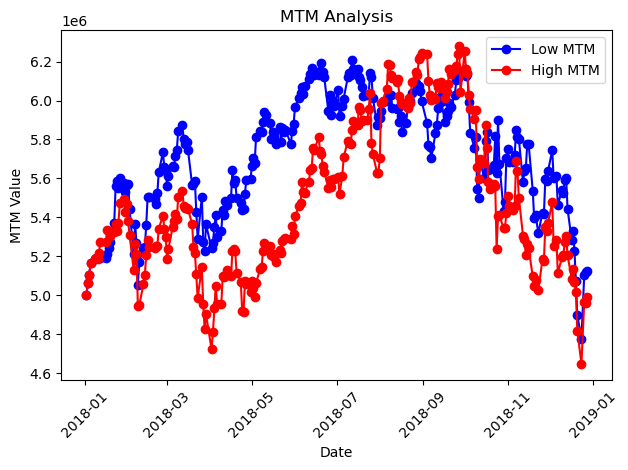

In [17]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the data
ax.plot(all_dates, MTM_array_low, label="Low MTM", marker='o', linestyle='-', color='b')
ax.plot(all_dates, MTM_array_high, label="High MTM", marker='o', linestyle='-', color='r')

# Add labels and title
ax.set_xlabel("Date")
ax.set_ylabel("MTM Value")
ax.set_title("MTM Analysis")

# Add a legend
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

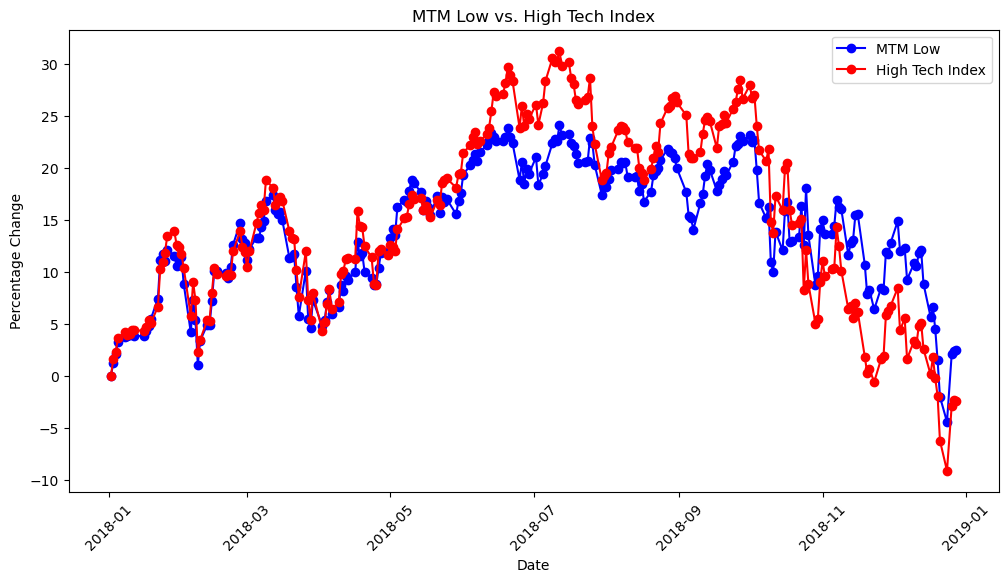

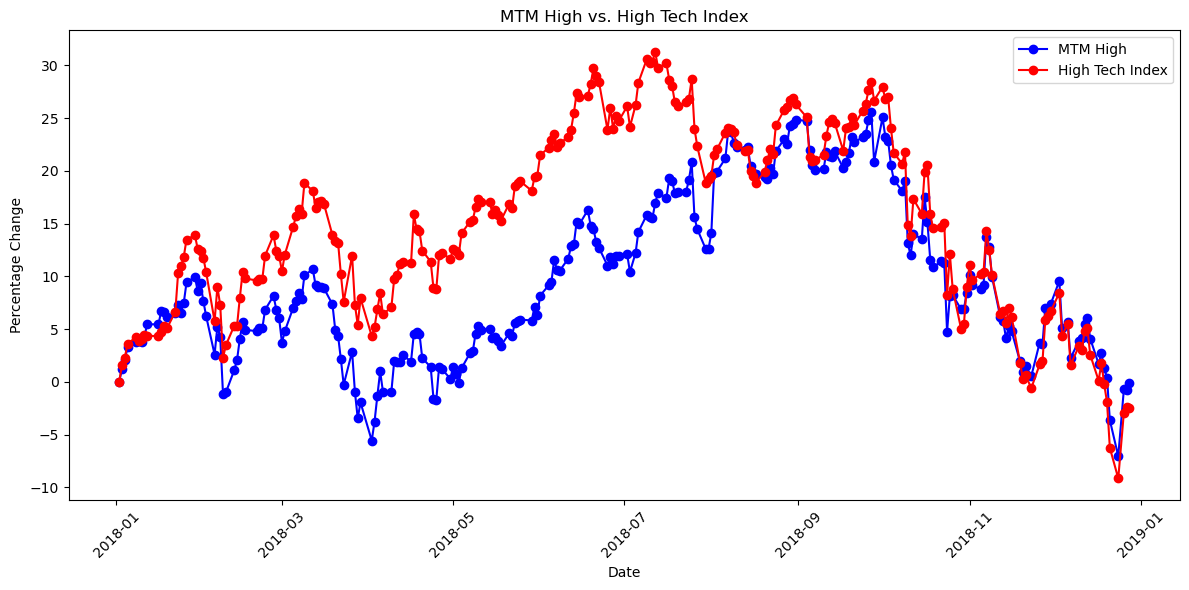

In [18]:
# 7. Creating a high tech index and plotting MTM_low and MTM_high
indexes = stocks_df.index

high_tech_index = pd.Series(np.zeros(len(indexes)),indexes)

# Calculating high text index
for stock in universe:
    high_tech_index += stocks_df[stock+"_Close"]
high_tech_index /= 10

# Convert all series into daily percentage change
high_tech_index_0 = high_tech_index.iloc[0]
high_tech_index_percent = ((high_tech_index-high_tech_index_0)/high_tech_index_0)*100

MTM_array_low_0 = MTM_array_low.iloc[0]
MTM_array_high_0 = MTM_array_low.iloc[0]
MTM_array_low_percent = ((MTM_array_low-MTM_array_low_0)/MTM_array_low_0)*100
MTM_array_high_percent = ((MTM_array_high-MTM_array_high_0)/MTM_array_high_0)*100

# Create a figure and axis for the first set of plots
fig, ax = plt.subplots(figsize=(12, 6))

# Plot MTM low and high tech index percent changes
ax.plot(indexes, MTM_array_low_percent, label="MTM Low", linestyle='-', marker='o',color='b')
ax.plot(indexes, high_tech_index_percent, label="High Tech Index", linestyle='-', marker='o',color='r')

# Set axis labels and a title
ax.set_xlabel("Date")
ax.set_ylabel("Percentage Change")
ax.set_title("MTM Low vs. High Tech Index")
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Create a figure and axis for the second set of plots
fig2, ax2 = plt.subplots(figsize=(12, 6))

# Plot MTM high and high tech index percent changes
ax2.plot(indexes, MTM_array_high_percent, label="MTM High", linestyle='-', marker='o',color='b')
ax2.plot(indexes, high_tech_index_percent, label="High Tech Index", linestyle='-', marker='o',color='r')

# Set axis labels and a title
ax2.set_xlabel("Date")
ax2.set_ylabel("Percentage Change")
ax2.set_title("MTM High vs. High Tech Index")
ax2.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plots
plt.tight_layout()
plt.show()


In [19]:
MTM_compare = pd.concat([pd.Series(all_dates), pd.Series(MTM_array_high), pd.Series(MTM_array_low)], axis = 1)
MTM_compare.columns = ["Date","MTM_high","MTM_low"]
MTM_compare.Date = pd.to_datetime(MTM_compare.Date)
MTM_compare

,Date,MTM_high,MTM_low
0,2018-01-02,5000000.00,5000000.00
1,2018-01-03,5061154.18,5061154.18
2,2018-01-04,5103663.50,5103663.50
3,2018-01-05,5164090.57,5164090.57
4,2018-01-08,5187050.88,5187050.88
...,...,...,...
245,2018-12-21,4819085.99,4899182.80
246,2018-12-24,4647897.24,4777853.00
247,2018-12-26,4965037.91,5102937.99
248,2018-12-27,4959690.20,5121250.62


In [20]:
# 8. Downloading the usdjpy data
usd_jpy = pd.read_csv("usdjpy.csv")

usd_jpy.Date = pd.to_datetime(usd_jpy.Date)

In [21]:
# Matching the dates of both dataframes
matching_dates = list(set(MTM_compare['Date']).intersection(set(usd_jpy['Date'])))
usd_jpy = pd.merge(pd.DataFrame(matching_dates, columns=['Date']), usd_jpy, on='Date')
usd_jpy = pd.merge(usd_jpy, MTM_compare, on='Date')
usd_jpy_Close = usd_jpy[["Close","MTM_high","MTM_low"]]
usd_jpy_Close.columns = ["Close","MTM_high_USD","MTM_low_USD"]
usd_jpy_Close

,Close,MTM_high_USD,MTM_low_USD
0,112.850998,5507865.58,5748827.00
1,113.555000,5240714.26,5778018.55
2,110.845001,5780330.69,6120592.47
3,106.435997,4934464.51,5353143.95
4,110.138000,5740749.94,6149206.39
...,...,...,...
245,106.111000,5247357.93,5503401.39
246,110.709999,5605404.06,6051723.69
247,109.869003,5289598.24,5838720.23
248,111.607002,6071826.82,5963142.26


In [22]:
# Calculating the MTM in JPY
usd_jpy_Close["MTM_low_JPY"] = usd_jpy_Close["MTM_low_USD"] * usd_jpy_Close.Close
usd_jpy_Close["MTM_high_JPY"] = usd_jpy_Close["MTM_high_USD"] * usd_jpy_Close.Close
usd_jpy_Close

,Close,MTM_high_USD,MTM_low_USD,MTM_low_JPY,MTM_high_JPY
0,112.850998,5507865.58,5748827.00,6.487609e+08,6.215681e+08
1,113.555000,5240714.26,5778018.55,6.561229e+08,5.951093e+08
2,110.845001,5780330.69,6120592.47,6.784371e+08,6.407208e+08
3,106.435997,4934464.51,5353143.95,5.697672e+08,5.252046e+08
4,110.138000,5740749.94,6149206.39,6.772613e+08,6.322747e+08
...,...,...,...,...,...
245,106.111000,5247357.93,5503401.39,5.839714e+08,5.568024e+08
246,110.709999,5605404.06,6051723.69,6.699863e+08,6.205743e+08
247,109.869003,5289598.24,5838720.23,6.414944e+08,5.811629e+08
248,111.607002,6071826.82,5963142.26,6.655284e+08,6.776584e+08


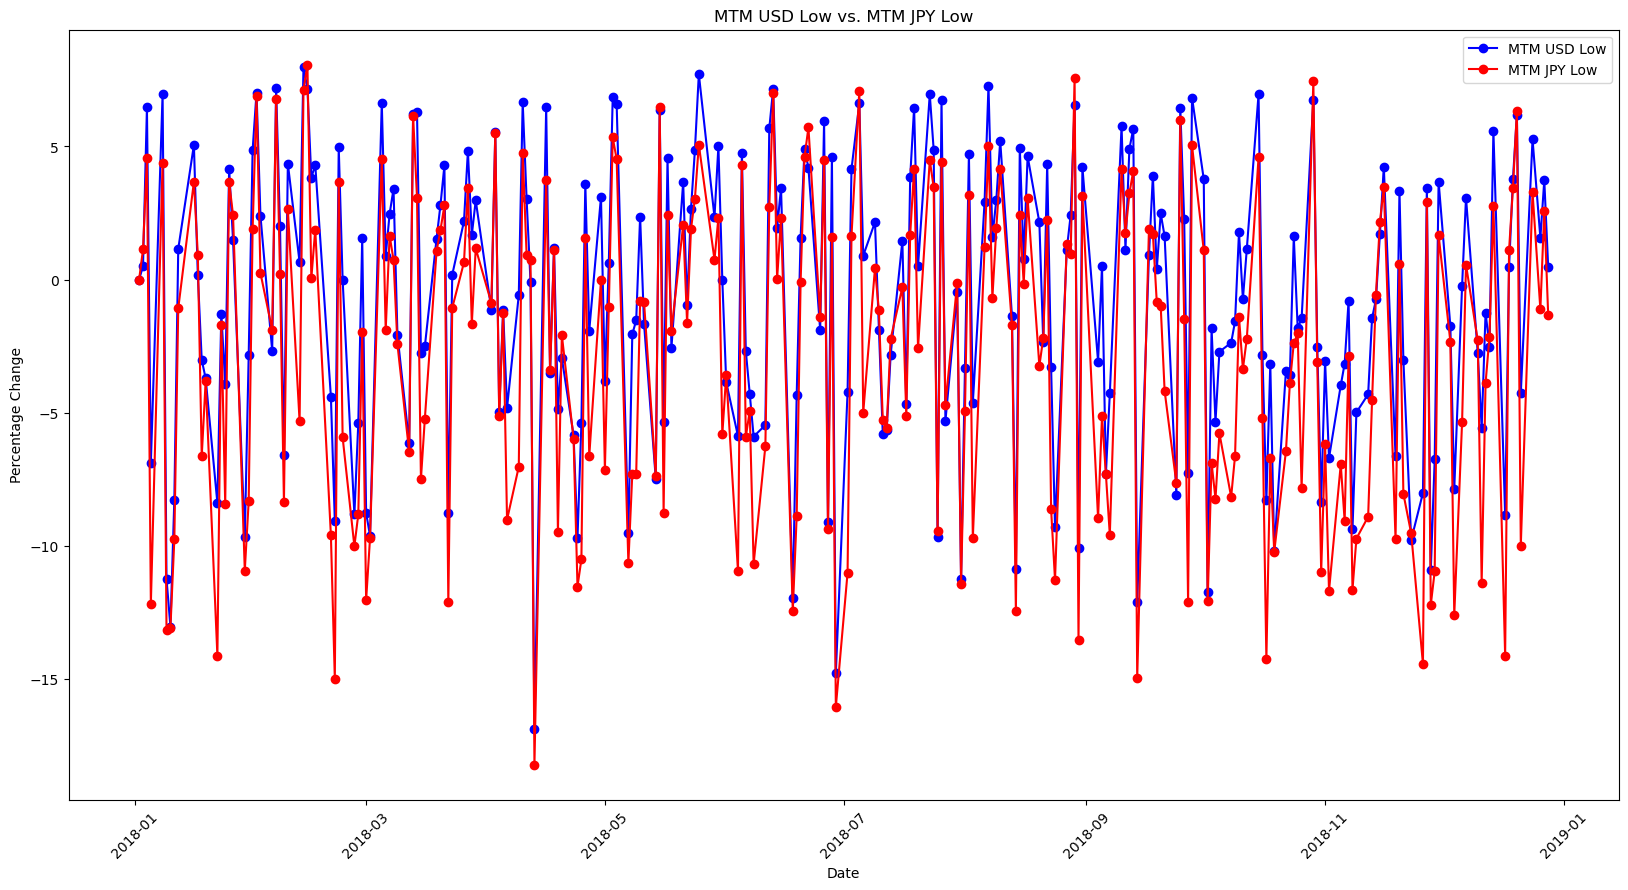

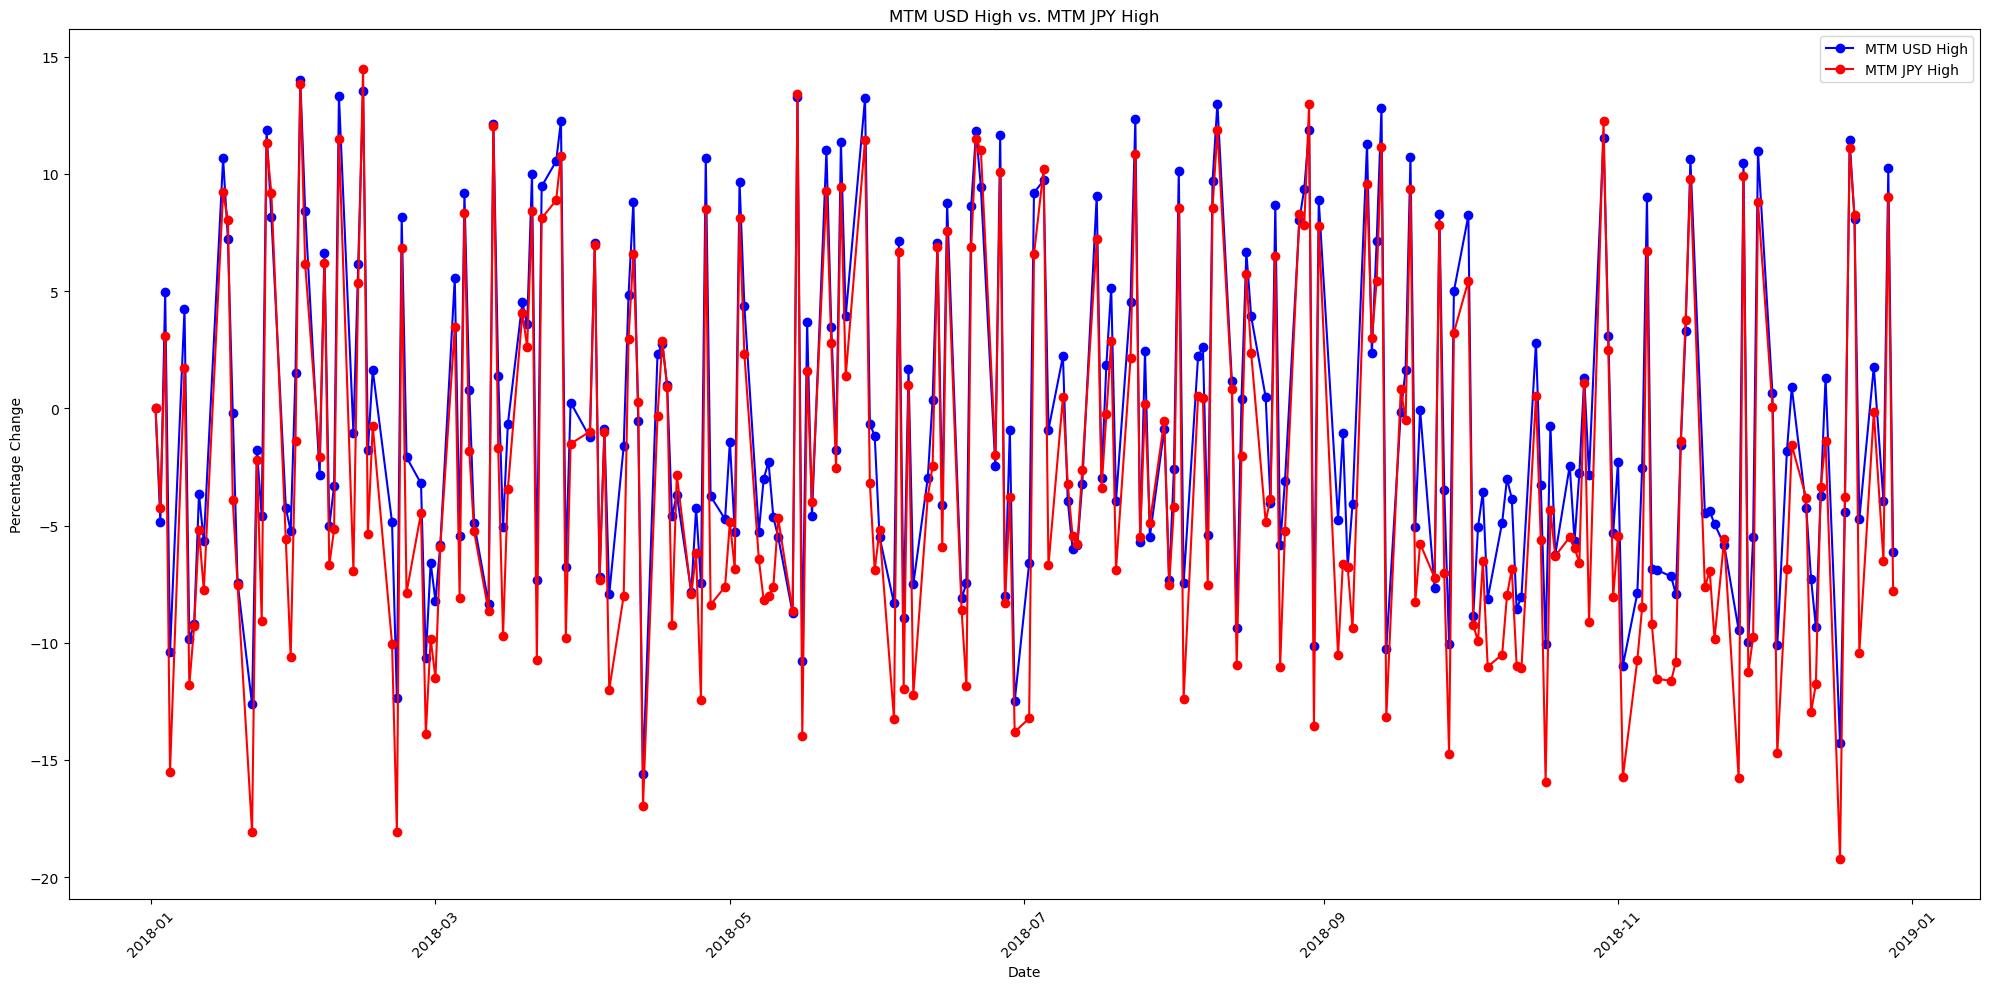

In [23]:
# JPY percentage change
MTM_array_low_jpy_0 = usd_jpy_Close.MTM_low_JPY.iloc[0]
MTM_array_high_jpy_0 = usd_jpy_Close.MTM_high_JPY.iloc[0]
MTM_array_low_jpy_percent = ((usd_jpy_Close.MTM_low_JPY-MTM_array_low_jpy_0)/MTM_array_low_jpy_0)*100
MTM_array_high_jpy_percent = ((usd_jpy_Close.MTM_high_JPY-MTM_array_high_jpy_0)/MTM_array_high_jpy_0)*100

# USD percentage change
MTM_array_low_usd_0 = usd_jpy_Close.MTM_low_USD.iloc[0]
MTM_array_high_usd_0 = usd_jpy_Close.MTM_high_USD.iloc[0]
MTM_array_low_usd_percent = ((usd_jpy_Close.MTM_low_USD-MTM_array_low_usd_0)/MTM_array_low_usd_0)*100
MTM_array_high_usd_percent = ((usd_jpy_Close.MTM_high_USD-MTM_array_high_usd_0)/MTM_array_high_usd_0)*100

# Create a figure and axis for the first set of plots
fig, ax = plt.subplots(figsize=(20, 10))

# Plot MTM low and high tech index percent changes
ax.plot(indexes, MTM_array_low_usd_percent, label="MTM USD Low", linestyle='-', marker='o',color='b')
ax.plot(indexes, MTM_array_low_jpy_percent, label="MTM JPY Low", linestyle='-', marker='o',color='r')

# Set axis labels and a title
ax.set_xlabel("Date")
ax.set_ylabel("Percentage Change")
ax.set_title("MTM USD Low vs. MTM JPY Low")
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Create a figure and axis for the second set of plots
fig2, ax2 = plt.subplots(figsize=(20, 10))

# Plot MTM high and high tech index percent changes
ax2.plot(indexes, MTM_array_high_usd_percent, label="MTM USD High", linestyle='-', marker='o',color='b')
ax2.plot(indexes, MTM_array_high_jpy_percent, label="MTM JPY High", linestyle='-', marker='o',color='r')

# Set axis labels and a title
ax2.set_xlabel("Date")
ax2.set_ylabel("Percentage Change")
ax2.set_title("MTM USD High vs. MTM JPY High")
ax2.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plots
plt.tight_layout()
plt.show()


In [24]:
# 9. Find optimal days interval to maximize MTM
def find_max_mtm(df, num_days,rebalance_type):
    cash_in_hand = 5000000
    stocks_to_buy = universe
    num_stocks_bought = {}
    cash_per_stock = cash_in_hand / 5
    
    MTM = 0
    all_dates = df.index.tolist()
    
    for stock in stocks_to_buy:
        num_stocks_bought[stock] = cash_per_stock // df.loc['2018-01-02',stock+"_Close"]
        cash_in_hand -= (df.loc['2018-01-02', stock+"_Close"] * num_stocks_bought[stock])
        
    prev_date = '2018-01-02'
    counter = 0
    all_mtms = []
    for date in all_dates:
        cash_in_hand += sumDividend(df,num_stocks_bought,date)

        if (counter%num_days == 0):
            if rebalance_type=="high":
                cash_in_hand, num_stocks_bought = RebalanceStocks(df,num_stocks_bought,cash_in_hand,prev_date,date,rebalance_type="high")
            elif rebalance_type=="low":
                cash_in_hand, num_stocks_bought = RebalanceStocks(df,num_stocks_bought,cash_in_hand,prev_date,date,rebalance_type="low")

        MTM = cash_in_hand
        for stock in num_stocks_bought:
            MTM += num_stocks_bought[stock] * df.loc[date,stock+"_Close"]

        all_mtms.append(MTM.round(2))
        counter += 1  
        prev_date = date

    MTM_array = pd.Series(all_mtms)
    MTM_max = MTM_array.iloc[-1]
    return MTM_max

In [25]:
low_mtms = []
high_mtms = []

for days in range(1,len(all_dates)+1):
    low_mtms.append(find_max_mtm(stocks_df, days, "low"))
    high_mtms.append(find_max_mtm(stocks_df, days, "high"))
    
low_mtms_series = pd.Series(low_mtms, index=np.arange(1, len(all_dates)+1))
high_mtms_series = pd.Series(high_mtms, index=np.arange(1, len(all_dates)+1))

print("Optimal days interval to maximise MTM using rebalance low is ", low_mtms_series.idxmax())
print(f"MTM at {low_mtms_series.idxmax()} days interval is",low_mtms_series.loc[low_mtms_series.idxmax()])
print()
print("Optimal days interval to maximise MTM using rebalance high is ", high_mtms_series.idxmax())
print(f"MTM at {high_mtms_series.idxmax()} days interval is",high_mtms_series.loc[high_mtms_series.idxmax()])
    

Optimal days interval to maximise MTM using rebalance low is  61
MTM at 61 days interval is 6138545.7

Optimal days interval to maximise MTM using rebalance high is  60
MTM at 60 days interval is 6084188.3
